# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
size = 200
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
num_cities = len(cities)
num_cities
cities_no_clean_df = pd.DataFrame(cities, columns =['City'])
cities_no_clean_df.head(20)

,City
0,bredasdorp
1,rikitea
2,bubaque
3,ushuaia
4,nikolskoye
5,longyearbyen
6,naziya
7,isangel
8,pevek
9,yellowknife


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

#columns = ['Latitude','Longitude','Temperature','Humidity']
cities_no_clean_df['Latitude'] = ""
cities_no_clean_df['Longitude'] = ""
cities_no_clean_df['Temperature'] = ""
cities_no_clean_df['Humidity'] = ""
cities_no_clean_df['Wind Speed (mph)'] = ''
cities_no_clean_df['Cloudiness'] = ''
cities_no_clean_df['Max Temp'] = ''
#cities_no_clean_df[columns] = ''




skipped_row = []
# Build query URL
#query_url = url + 'lat=' + latitud + '&lon=' + longitud + "&appid=" + api_key + "&units=metric"

for index, row in cities_no_clean_df.iterrows():
    city_name = row['City']

    
    cities_url = url + 'q=' + city_name   + '&appid=' + weather_api_key + '&units=' + units
    city_json = requests.get(cities_url).json()
    try:
        
        cities_no_clean_df.loc[index,'Latitude'] = city_json['coord']['lat']
        cities_no_clean_df.loc[index,'Longitude'] = city_json['coord']['lon']
        cities_no_clean_df.loc[index,'Temperature'] = city_json['main']['temp']
        cities_no_clean_df['Max Temp'] = city_json['main']['temp_max']
        cities_no_clean_df.loc[index,'Humidity'] = city_json['main']['humidity']
        cities_no_clean_df.loc[index,'Wind Speed (mph)'] = city_json['wind']['speed']
        cities_no_clean_df.loc[index,'Cloudiness'] = city_json['clouds']['all']
        

        print(f'Processing Record {index + 1} of {num_cities} | {city_name}')
        
    except (KeyError, IndexError):
        print(f"Missing field/result... skipping row {index + 1} .")
        cities_no_clean_df.loc[index,'Latitude'] = None
        #cities_no_clean_df.loc[index,'Longitude'] = None
        #cities_no_clean_df.loc[index,'Temperature'] = None
        #cities_no_clean_df.loc[index,'Humidity'] = None
        #cities_no_clean_df.loc[index,'Wind Speed (mph)'] = None
        #cities_no_clean_df['Cloudiness'] = None
        skipped_row.append(index)
        
    

cities_no_clean_df.head(20)


Processing Record 1 of 142 | bredasdorp
Processing Record 2 of 142 | rikitea
Processing Record 3 of 142 | bubaque
Processing Record 4 of 142 | ushuaia
Processing Record 5 of 142 | nikolskoye
Processing Record 6 of 142 | longyearbyen
Processing Record 7 of 142 | naziya
Processing Record 8 of 142 | isangel
Processing Record 9 of 142 | pevek
Processing Record 10 of 142 | yellowknife
Processing Record 11 of 142 | sebastian
Processing Record 12 of 142 | mataura
Processing Record 13 of 142 | kapaa
Processing Record 14 of 142 | puerto ayora
Processing Record 15 of 142 | husavik
Processing Record 16 of 142 | kavieng
Processing Record 17 of 142 | arraial do cabo
Processing Record 18 of 142 | gazanjyk
Processing Record 19 of 142 | mar del plata
Processing Record 20 of 142 | upernavik
Processing Record 21 of 142 | dingle
Processing Record 22 of 142 | busselton
Processing Record 23 of 142 | ribeira grande
Processing Record 24 of 142 | tura
Processing Record 25 of 142 | qaanaaq
Processing Record 26

,City,Latitude,Longitude,Temperature,Humidity,Wind Speed (mph),Cloudiness,Max Temp
0,bredasdorp,-34.5322,20.0403,55.4,82,8.05,5,28.4
1,rikitea,-23.1203,-134.969,75.78,67,9.55,67,28.4
2,bubaque,11.2833,-15.8333,77.23,69,14.58,65,28.4
3,ushuaia,-54.8,-68.3,35.6,80,31.07,75,28.4
4,nikolskoye,59.7035,30.7861,34.39,80,2.24,0,28.4
5,longyearbyen,78.2186,15.6401,19.4,63,18.41,75,28.4
6,naziya,59.8,31.3833,35.01,57,5.66,100,28.4
7,isangel,-19.55,169.267,78.8,61,11.5,20,28.4
8,pevek,69.7008,170.313,24.89,79,4.56,99,28.4
9,yellowknife,62.456,-114.353,23,58,13.8,75,28.4


In [4]:
cities_url = url + 'q=' + 'puerto ayora'   + '&appid=' + weather_api_key + '&units=' + units

requests.get(cities_url).json()
print(len(cities_no_clean_df))

142


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df = cities_no_clean_df.dropna().reset_index(drop=True)

cities_df.to_csv(output_data_file, index = False)
print(len(cities_df))
cities_df.head(30)

131


,City,Latitude,Longitude,Temperature,Humidity,Wind Speed (mph),Cloudiness,Max Temp
0,bredasdorp,-34.5322,20.0403,55.4,82,8.05,5,28.4
1,rikitea,-23.1203,-134.969,75.78,67,9.55,67,28.4
2,bubaque,11.2833,-15.8333,77.23,69,14.58,65,28.4
3,ushuaia,-54.8,-68.3,35.6,80,31.07,75,28.4
4,nikolskoye,59.7035,30.7861,34.39,80,2.24,0,28.4
5,longyearbyen,78.2186,15.6401,19.4,63,18.41,75,28.4
6,naziya,59.8,31.3833,35.01,57,5.66,100,28.4
7,isangel,-19.55,169.267,78.8,61,11.5,20,28.4
8,pevek,69.7008,170.313,24.89,79,4.56,99,28.4
9,yellowknife,62.456,-114.353,23,58,13.8,75,28.4


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_humidity_df = cities_df.loc[cities_df['Humidity'] <=100,:]
print(len(cities_humidity_df))
cities_humidity_df.head()


131


,City,Latitude,Longitude,Temperature,Humidity,Wind Speed (mph),Cloudiness,Max Temp
0,bredasdorp,-34.5322,20.0403,55.4,82,8.05,5,28.4
1,rikitea,-23.1203,-134.969,75.78,67,9.55,67,28.4
2,bubaque,11.2833,-15.8333,77.23,69,14.58,65,28.4
3,ushuaia,-54.8,-68.3,35.6,80,31.07,75,28.4
4,nikolskoye,59.7035,30.7861,34.39,80,2.24,0,28.4


In [7]:
#  Get the indices of cities that have humidity over 100%.
cities_humidity_100_df = cities_df.loc[cities_df['Humidity'] > 100,:]
cities_humidity_100_df.index.to_numpy()
cities_humidity_100_df

,City,Latitude,Longitude,Temperature,Humidity,Wind Speed (mph),Cloudiness,Max Temp


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

(-95, 95)

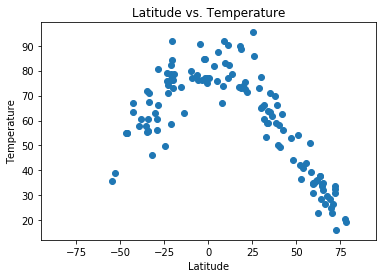

In [9]:
latitude = cities_humidity_df['Latitude']
temperature = cities_humidity_df['Temperature']

humidity = cities_humidity_df['Humidity']
cloudiness = cities_humidity_df['Cloudiness']
wind_speed = cities_humidity_df['Wind Speed (mph)']

lat_temp = plt.scatter(x = latitude,y = temperature)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.xlim(-95,95)


## Latitude vs. Humidity Plot

(-95, 95)

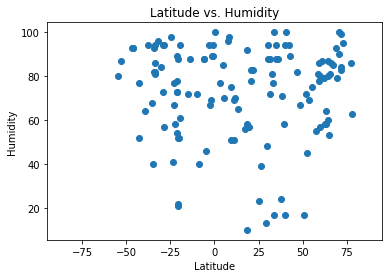

In [10]:
lat_humidity = plt.scatter(x = latitude,y = humidity)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(-95,95)

## Latitude vs. Cloudiness Plot

(-95, 95)

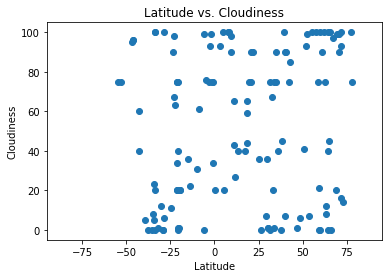

In [11]:
lat_cloudiness = plt.scatter(x = latitude,y = cloudiness)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(-95,95)

## Latitude vs. Wind Speed Plot

(-95, 95)

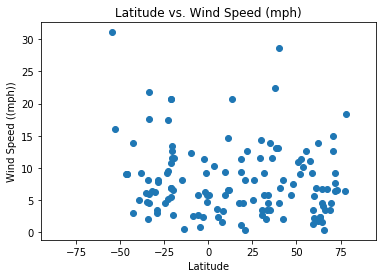

In [12]:
lat_wind = plt.scatter(x = latitude,y = wind_speed)
plt.title('Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed ((mph))')
plt.xlim(-95,95)

## Linear Regression

In [13]:
northern = cities_humidity_df.loc[cities_humidity_df['Latitude']>=0,:]
northern_lat = northern['Latitude']
southern = cities_humidity_df.loc[cities_humidity_df['Latitude']<0,:]
southern_lat = southern['Latitude']

print(len(northern_lat))
print(len(northern['Max Temp']))

78
78


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
# Perform a linear regression on year versus violent crime rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern['Max Temp'])
northern['Max Temp']

NameError: name 'stats' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression